In [ ]:
# imbinarize('adaptive')
# keras and functional API
# solution for overfitting dropout

In [86]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [87]:
# mnist = tf.keras.datasets.mnist
# mnist

In [88]:
train = pd.read_csv('train.csv')
train.info()
train = np.array(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
# train.head()

In [12]:
# ds = tf.data.Dataset.from_tensor_slices(dict(train_data))

In [89]:
x_train = train[:,1:]
y_train = train[:,0]

In [90]:
x_train[0].shape

(784,)

In [91]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [23]:
# (x_train, y_train), (x_test, y_test)= mnist.load_data()
# x_train.shape
# y_train.shape

In [28]:
# plt.imshow(x_train[0], cmap = plt.cm.binary)
# plt.show()
# y_train[index]

In [92]:
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

In [93]:
# index = 1001
x_train = tf.keras.utils.normalize(x_train, axis = 1)
# # x_test = tf.keras.utils.normalize(x_test, axis = 1)
# plt.imshow(x_train[index], cmap = plt.cm.binary)
# plt.show()
# y_train[index]

In [34]:
x_train[0].max()

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'max'

In [94]:
x_trainr = np.array(x_train).reshape(42000,28,28,1)
# x_testr = np.array(x_test).reshape(-1,28,28,1)
x_trainr.shape

(42000, 28, 28, 1)

In [37]:
# x_testr.shape

(10000, 28, 28, 1)

In [95]:
INPUT_SHAPE = (28,28,1)
model = Sequential()

#first layer 
model.add(Conv2D(64, (3,3),activation = 'relu', input_shape = INPUT_SHAPE))
model.add(MaxPooling2D(pool_size = (2,2)))

#second layer
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#third layer 
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#neural network
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [96]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [97]:
model.fit(x_trainr, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.4314 - accuracy: 0.8626 - val_loss: 0.1530 - val_accuracy: 0.9549
Epoch 2/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.1445 - accuracy: 0.9555 - val_loss: 0.1273 - val_accuracy: 0.9600
Epoch 3/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.1039 - accuracy: 0.9685 - val_loss: 0.0959 - val_accuracy: 0.9712
Epoch 4/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0835 - accuracy: 0.9744 - val_loss: 0.0855 - val_accuracy: 0.9727
Epoch 5/10
1050/1050 [==============================] - 18s 18ms/step - loss: 0.0671 - accuracy: 0.9789 - val_loss: 0.0722 - val_accuracy: 0.9786
Epoch 6/10
1050/1050 [==============================] - 18s 18ms/step - loss: 0.0577 - accuracy: 0.9824 - val_loss: 0.0631 - val_accuracy: 0.9807
Epoch 7/10
1050/1050 [==============================] - 18s 18ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0707 -

In [99]:
test = pd.read_csv('test.csv')
x_test = np.array(test)
lenth = len(x_test)
x_test = tf.convert_to_tensor(x_test)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
x_testr = np.array(x_test).reshape(lenth,28,28,1)

In [100]:
# .

# test_loss, test_acc= model.evaluate(x_testr, y_test)

In [58]:
test_loss 

0.06135779246687889

In [57]:
test_acc * 100

98.24000000953674

In [101]:
predictions = model.predict(x_testr)

In [62]:
np.argmax(predictions[0])

7

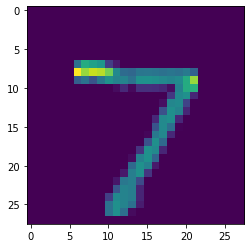

In [64]:
plt.imshow(x_testr[0])

In [ ]:
# import cv2
# img = cv2.imread('abc.png')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# resized_img = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
#NORMALIZE 
#MODIFY THE SIZE
#THEN PREDICT


In [70]:
predictions

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [102]:
final = np.argmax(predictions, axis  = 1)


In [103]:
final

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [104]:
test_label = pd.DataFrame(final, columns = ['Label'])
test_label.index.name = 'ImageId'
test_label.index += 1 

In [105]:
test_label

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3


In [106]:
test_label.to_csv('submission.csv')

In [107]:
test_label.shape

(28000, 1)